In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------
# 1. Dataset
# -------------------------
data = {
    "patient": ["Arun", "Priya", "Kiran", None, "Sneha", "Arun",
                "Ravi", "Maya", None, "Karthi"],
    
    "age": [25, "30", 17, None, 45, 25, "150", 60, None, 22],
    
    "symptom": [
        "fever", "Cold ", "cough", "Fever", None,
        "headache", "COUGH", "cold", "Fever ", "headache"
    ],
    
    "severity": [3, None, 2, 4, 5, None, 1, 2, None, 3],
    
    "consultation_fee": [300, None, 250, 400, 350, None, "500", 450, None, 600]
}

df = pd.DataFrame(data)

# -------------------------
# 2. Cleaning
# -------------------------

# Fix missing names
df["patient"] = df["patient"].fillna("Unknown")

# Drop duplicates
df = df.drop_duplicates()

# Fix number columns
num_cols = ["age", "severity", "consultation_fee"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Fix invalid ages (> 120)
df["age"] = df["age"].apply(lambda x: None if x is None or x > 120 else x)

# Fill missing numeric values
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Clean symptom column
df["symptom"] = df["symptom"].fillna("unknown")
df["symptom"] = df["symptom"].str.strip().str.lower()

# Add risk score
df["risk_score"] = df["severity"] * (df["age"] / df["age"].max())

# Age grouping
df["age_group"] = pd.cut(
    df["age"], bins=[0, 18, 40, 60, 100],
    labels=["Teen", "Adult", "Middle Age", "Senior"]
)

print("\nCleaned Data:")
print(df)

# -------------------------
# 3. Dashboard Visualizations (5 Charts)
# -------------------------

# Chart 1 – Severity Bar
plt.bar(df["patient"], df["severity"])
plt.title("Severity Level per Patient")
plt.xticks(rotation=45)
plt.show()

# Chart 2 – Symptom Distribution
plt.pie(df["symptom"].value_counts(), labels=df["symptom"].value_counts().index, autopct="%1.1f%%")
plt.title("Symptom Distribution")
plt.show()

# Chart 3 – Age Group Distribution
plt.bar(df["age_group"].value_counts().index, df["age_group"].value_counts().values)
plt.title("Patient Age Group Distribution")
plt.show()

# Chart 4 – Risk Score Line Chart
plt.plot(df["patient"], df["risk_score"], marker="o")
plt.title("Health Risk Score")
plt.xticks(rotation=45)
plt.show()

# Chart 5 – Fee vs Severity (Scatter)
plt.scatter(df["consultation_fee"], df["severity"])
plt.xlabel("Consultation Fee")
plt.ylabel("Severity")
plt.title("Fee vs Severity")
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = {
    "patient": ["Arun", "Priya", "Kiran", None, "Sneha", "Arun",
                "Ravi", "Maya", None, "Karthi"],
    
    "age": [25, "30", 17, None, 45, 25, "150", 60, None, 22],
    
    "symptom": [
        "fever", "Cold ", "cough", "Fever", None,
        "headache", "COUGH", "cold", "Fever ", "headache"
    ],
    
    "severity": [3, None, 2, 4, 5, None, 1, 2, None, 3],
    
    "consultation_fee": [300, None, 250, 400, 350, None, "500", 450, None, 600]
}
data


{'patient': ['Arun',
  'Priya',
  'Kiran',
  None,
  'Sneha',
  'Arun',
  'Ravi',
  'Maya',
  None,
  'Karthi'],
 'age': [25, '30', 17, None, 45, 25, '150', 60, None, 22],
 'symptom': ['fever',
  'Cold ',
  'cough',
  'Fever',
  None,
  'headache',
  'COUGH',
  'cold',
  'Fever ',
  'headache'],
 'severity': [3, None, 2, 4, 5, None, 1, 2, None, 3],
 'consultation_fee': [300, None, 250, 400, 350, None, '500', 450, None, 600]}

In [4]:
df= pd.DataFrame(data)
df

,patient,age,symptom,severity,consultation_fee
0,Arun,25,fever,3.0,300
1,Priya,30,Cold,NaN,None
2,Kiran,17,cough,2.0,250
3,None,None,Fever,4.0,400
4,Sneha,45,None,5.0,350
5,Arun,25,headache,NaN,None
6,Ravi,150,COUGH,1.0,500
7,Maya,60,cold,2.0,450
8,None,None,Fever,NaN,None
9,Karthi,22,headache,3.0,600


In [6]:
# Fix missing names
df["patient"] = df["patient"].fillna("Unknown")
df

,patient,age,symptom,severity,consultation_fee
0,Arun,25,fever,3.0,300
1,Priya,30,Cold,NaN,None
2,Kiran,17,cough,2.0,250
3,Unknown,None,Fever,4.0,400
4,Sneha,45,None,5.0,350
5,Arun,25,headache,NaN,None
6,Ravi,150,COUGH,1.0,500
7,Maya,60,cold,2.0,450
8,Unknown,None,Fever,NaN,None
9,Karthi,22,headache,3.0,600


In [8]:
# Drop duplicates
df = df.drop_duplicates(data)
df

,patient,age,symptom,severity,consultation_fee
0,Arun,25,fever,3.0,300
1,Priya,30,Cold,NaN,None
2,Kiran,17,cough,2.0,250
3,Unknown,None,Fever,4.0,400
4,Sneha,45,None,5.0,350
5,Arun,25,headache,NaN,None
6,Ravi,150,COUGH,1.0,500
7,Maya,60,cold,2.0,450
8,Unknown,None,Fever,NaN,None
9,Karthi,22,headache,3.0,600


In [13]:

# Fix number columns
num_cols = ["age", "severity", "consultation_fee"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    print(col)
df    

age
severity
consultation_fee


,patient,age,symptom,severity,consultation_fee
0,Arun,25.0,fever,3.0,300.0
1,Priya,30.0,Cold,NaN,NaN
2,Kiran,17.0,cough,2.0,250.0
3,Unknown,NaN,Fever,4.0,400.0
4,Sneha,45.0,None,5.0,350.0
5,Arun,25.0,headache,NaN,NaN
6,Ravi,150.0,COUGH,1.0,500.0
7,Maya,60.0,cold,2.0,450.0
8,Unknown,NaN,Fever,NaN,NaN
9,Karthi,22.0,headache,3.0,600.0


In [14]:
# Fix invalid ages (> 120)
df["age"] = df["age"].apply(lambda x: None if x is None or x > 120 else x)
df

,patient,age,symptom,severity,consultation_fee
0,Arun,25.0,fever,3.0,300.0
1,Priya,30.0,Cold,NaN,NaN
2,Kiran,17.0,cough,2.0,250.0
3,Unknown,NaN,Fever,4.0,400.0
4,Sneha,45.0,None,5.0,350.0
5,Arun,25.0,headache,NaN,NaN
6,Ravi,NaN,COUGH,1.0,500.0
7,Maya,60.0,cold,2.0,450.0
8,Unknown,NaN,Fever,NaN,NaN
9,Karthi,22.0,headache,3.0,600.0


In [15]:
# Fill missing numeric values
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
df


,patient,age,symptom,severity,consultation_fee
0,Arun,25.0,fever,3.0,300.0
1,Priya,30.0,Cold,3.0,400.0
2,Kiran,17.0,cough,2.0,250.0
3,Unknown,25.0,Fever,4.0,400.0
4,Sneha,45.0,None,5.0,350.0
5,Arun,25.0,headache,3.0,400.0
6,Ravi,25.0,COUGH,1.0,500.0
7,Maya,60.0,cold,2.0,450.0
8,Unknown,25.0,Fever,3.0,400.0
9,Karthi,22.0,headache,3.0,600.0


In [16]:
# Clean symptom column
df["symptom"] = df["symptom"].fillna("unknown")
df["symptom"] = df["symptom"].str.strip().str.lower()
df

,patient,age,symptom,severity,consultation_fee
0,Arun,25.0,fever,3.0,300.0
1,Priya,30.0,cold,3.0,400.0
2,Kiran,17.0,cough,2.0,250.0
3,Unknown,25.0,fever,4.0,400.0
4,Sneha,45.0,unknown,5.0,350.0
5,Arun,25.0,headache,3.0,400.0
6,Ravi,25.0,cough,1.0,500.0
7,Maya,60.0,cold,2.0,450.0
8,Unknown,25.0,fever,3.0,400.0
9,Karthi,22.0,headache,3.0,600.0


## This is an important  part ::

In [17]:
# Add risk score
df["risk_score"] = df["severity"] * (df["age"] / df["age"].max())     
df 

,patient,age,symptom,severity,consultation_fee,risk_score
0,Arun,25.0,fever,3.0,300.0,1.250000
1,Priya,30.0,cold,3.0,400.0,1.500000
2,Kiran,17.0,cough,2.0,250.0,0.566667
3,Unknown,25.0,fever,4.0,400.0,1.666667
4,Sneha,45.0,unknown,5.0,350.0,3.750000
5,Arun,25.0,headache,3.0,400.0,1.250000
6,Ravi,25.0,cough,1.0,500.0,0.416667
7,Maya,60.0,cold,2.0,450.0,2.000000
8,Unknown,25.0,fever,3.0,400.0,1.250000
9,Karthi,22.0,headache,3.0,600.0,1.100000


In [19]:
# Age grouping
df["age_group"] = pd.cut( df["age"], bins=[0, 18, 40, 60, 100], labels=["Teen", "Adult", "Middle Age", "Senior"])
df

,patient,age,symptom,severity,consultation_fee,risk_score,age_group
0,Arun,25.0,fever,3.0,300.0,1.250000,Adult
1,Priya,30.0,cold,3.0,400.0,1.500000,Adult
2,Kiran,17.0,cough,2.0,250.0,0.566667,Teen
3,Unknown,25.0,fever,4.0,400.0,1.666667,Adult
4,Sneha,45.0,unknown,5.0,350.0,3.750000,Middle Age
5,Arun,25.0,headache,3.0,400.0,1.250000,Adult
6,Ravi,25.0,cough,1.0,500.0,0.416667,Adult
7,Maya,60.0,cold,2.0,450.0,2.000000,Middle Age
8,Unknown,25.0,fever,3.0,400.0,1.250000,Adult
9,Karthi,22.0,headache,3.0,600.0,1.100000,Adult


#  Dashboard Visualizations 

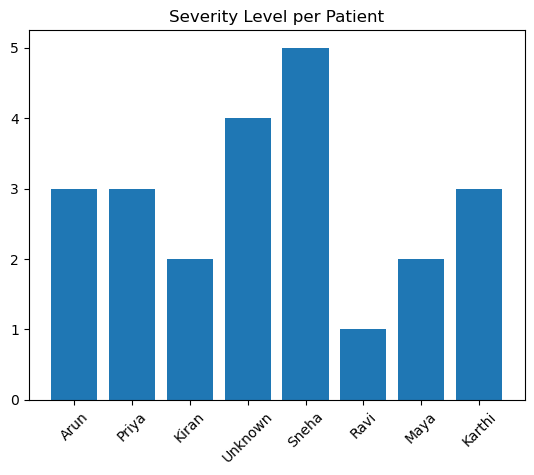

In [20]:
# Chart 1 – Severity Bar
plt.bar(df["patient"], df["severity"])
plt.title("Severity Level per Patient")
plt.xticks(rotation=45)
plt.show()


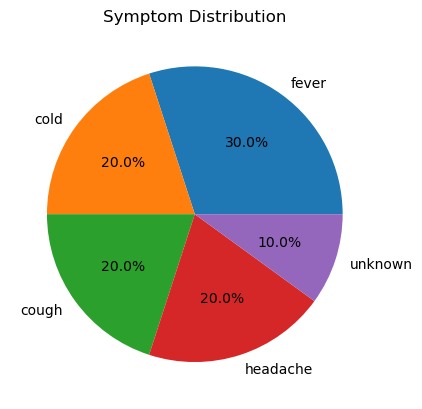

In [21]:
# Chart 2 – Symptom Distribution
plt.pie(df["symptom"].value_counts(), labels=df["symptom"].value_counts().index, autopct="%1.1f%%")
plt.title("Symptom Distribution")
plt.show()

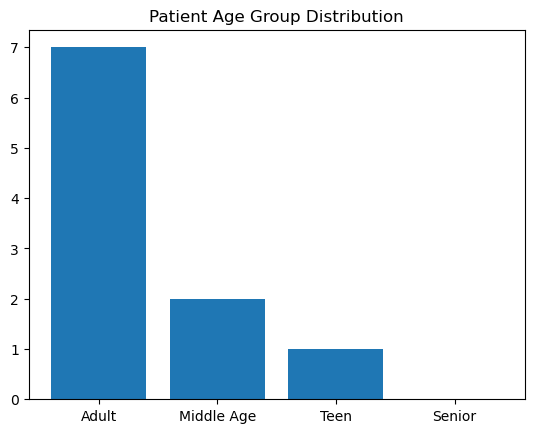

In [22]:
# Chart 3 – Age Group Distribution
plt.bar(df["age_group"].value_counts().index, df["age_group"].value_counts().values)
plt.title("Patient Age Group Distribution")
plt.show()


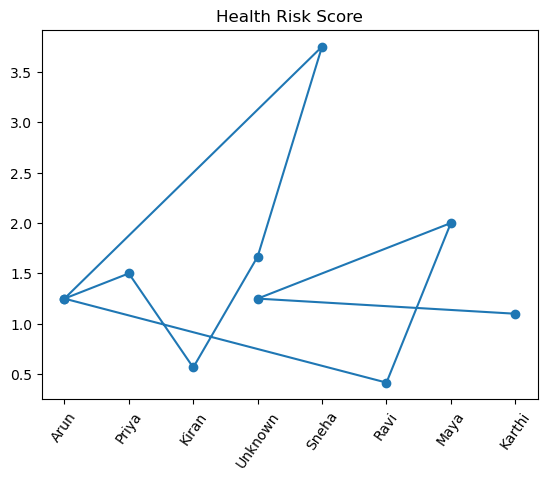

In [25]:
# Chart 4 – Risk Score Line Chart
plt.plot(df["patient"], df["risk_score"], marker="o")
plt.title("Health Risk Score")
plt.xticks(rotation=55)
plt.show()

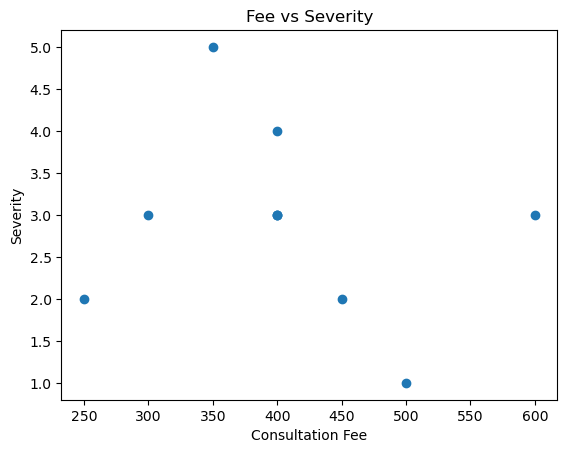

In [26]:
# Chart 5 – Fee vs Severity (Scatter)
plt.scatter(df["consultation_fee"], df["severity"])
plt.xlabel("Consultation Fee")
plt.ylabel("Severity")
plt.title("Fee vs Severity")
plt.show()